## SpaCy Introduction for NLP | Combining NLP Models and Custom rules

###### Watch Full Video Here:  https://youtu.be/yHmfOWryK4M

You can combine statistical and rule-based components in a variety of ways. Rule-based components can be used to improve the accuracy of statistical models, by presetting tags, entities or sentence boundaries for specific tokens. The statistical models will usually respect these preset annotations, which sometimes improves the accuracy of other decisions. You can also use rule-based components after a statistical model to correct common errors. Finally, rule-based components can reference the attributes set by statistical models, in order to implement more abstract logic.

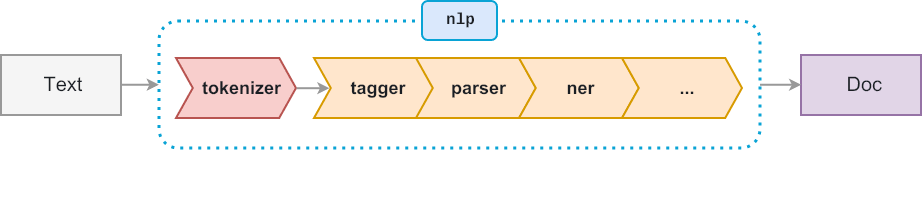

In [ ]:
# !pip install -U spacy

In [ ]:
# !pip install -U spacy-lookups-data

In [ ]:
# !python -m spacy download en_core_web_sm

### Expanding named entities 

For example, the corpus spaCy’s English models were trained on defines a PERSON entity as just the person name, without titles like “Mr” or “Dr”. This makes sense, because it makes it easier to resolve the entity type back to a knowledge base. But what if your application needs the full names, including the titles?

- Mr. laxmi kant

In [2]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
doc = nlp('Dr. Alex Smith chaired first board meeting at Google')

In [5]:
doc

Dr. Alex Smith chaired first board meeting at Google

In [6]:
print([(ent.text, ent.label_) for ent in doc.ents])

[('Alex Smith', 'PERSON'), ('first', 'ORDINAL'), ('Google', 'ORG')]


In [7]:
def add_title(doc):
    new_ents = []
    for ent in doc.ents:
        if ent.label_ == 'PERSON' and ent.start!=0:
            prev_token = doc[ent.start-1]
            if prev_token.text in ('Dr', 'Dr.', 'Mr', 'Mr.'):
                new_ent = Span(doc, ent.start-1, ent.end, label=ent.label)
                new_ents.append(new_ent)
            else:
                new_ents.append(ent)
    doc.ents = new_ents
    return doc

In [9]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(add_title, after='ner')

In [11]:
doc = nlp('Dr. Alex Smith chaired first board meeting at Google')

In [12]:
print([(ent.text, ent.label_) for ent in doc.ents])

[('Dr. Alex Smith', 'PERSON')]


### Use of POS and Dep Parsing 

In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
doc = nlp('Alex Smith was working at Google')

In [17]:
displacy.render(doc, style='dep', options = {'compact':True, 'distance':100})

In [24]:
def get_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_=="PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == 'work':
            preps = [token for token in head.children if token.dep_ == 'prep']
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == 'ORG']
                print({'person': ent, 'orgs': orgs, 'past': head.tag_ == "VBD"})
    return doc

In [25]:
from spacy.pipeline import merge_entities

In [26]:
nlp = spacy.load('en_core_web_sm')

In [27]:
nlp.add_pipe(merge_entities)

In [28]:
nlp.add_pipe(get_person_orgs)

In [30]:
doc = nlp('Alex Smith worked at Google')

{'person': Alex Smith, 'orgs': [Google], 'past': True}


#### Modify model 

In [38]:
def get_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_=="PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == 'work':
            preps = [token for token in head.children if token.dep_ == 'prep']
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == 'ORG']
                
                aux = [token for token in head.children if token.dep_ == 'aux']
                past_aux = any(t.tag_ == 'VBD' for t in aux)
                past = head.tag_ == 'VBD' or head.tag_ == 'VBG' and past_aux
             
            print({'person': ent, 'orgs': orgs, 'past': past})   
    return doc

In [39]:
from spacy.pipeline import merge_entities

In [40]:
nlp = spacy.load('en_core_web_sm')

In [41]:
nlp.add_pipe(merge_entities)

In [42]:
nlp.add_pipe(get_person_orgs)

In [48]:
doc = nlp('Alex Smith was working at Google')

{'person': Alex Smith, 'orgs': [Google], 'past': True}
